# **Austrian Energy consumption prediction and optimization using machine learning**

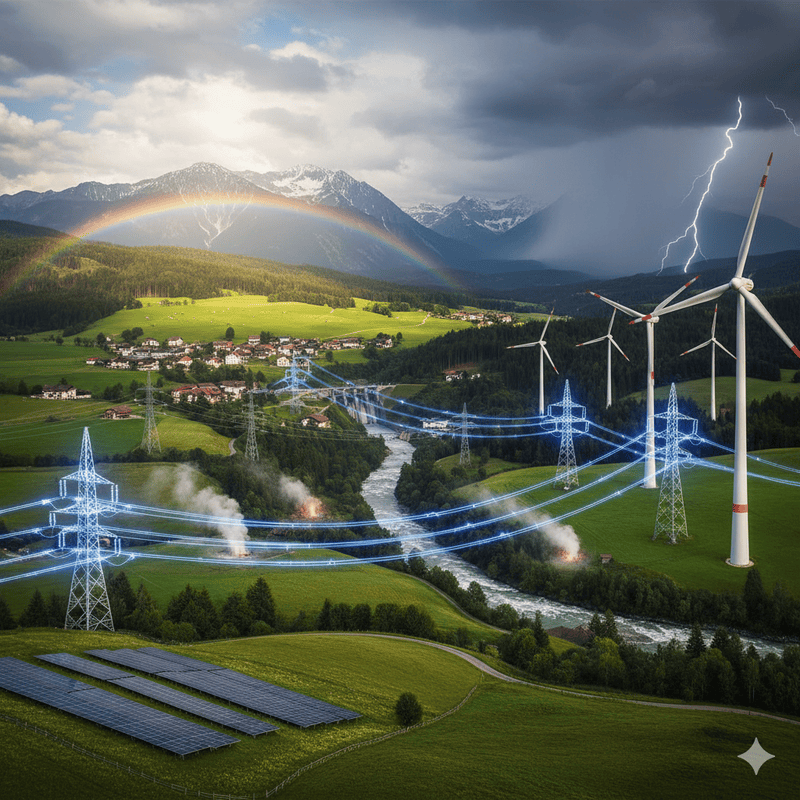

## loading all important libraries

In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
from datetime import timedelta
import seaborn as sns
import plotly
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## load Energy Weather data

In [ ]:
df=pd.read_csv("/content/energy_weather_data.csv",index_col="datetime",parse_dates=True)
df.head()

AT_load_actual_entsoe_transparency  \
datetime                                                  
2015-01-01 00:00:00                              5946.0   
2015-01-01 01:00:00                              5726.0   
2015-01-01 02:00:00                              5347.0   
2015-01-01 03:00:00                              5249.0   
2015-01-01 04:00:00                              5309.0   

                     AT_load_forecast_entsoe_transparency  AT_price_day_ahead  \
datetime                                                                        
2015-01-01 00:00:00                                6701.0                35.0   
2015-01-01 01:00:00                                6593.0                45.0   
2015-01-01 02:00:00                                6482.0                41.0   
2015-01-01 03:00:00                                6454.0                38.0   
2015-01-01 04:00:00                                6609.0                35.0   

                     AT_solar_generation_actual  \
datetime                                          
2015-01-01 00:00:00                         NaN   
2015-01-01 01:00:00                         NaN   
2015-01-01 02:00:00                         NaN   
2015-01-01 03:00:00                         NaN   
2015-01-01 04:00:00                         NaN   

                     AT_wind_onshore_generation_actual  temperature_2m  \
datetime                                                                 
2015-01-01 00:00:00                               69.0            -3.3   
2015-01-01 01:00:00                               64.0            -3.1   
2015-01-01 02:00:00                               65.0            -2.6   
2015-01-01 03:00:00                               64.0            -2.2   
2015-01-01 04:00:00                               64.0            -1.9   

                     relative_humidity_2m  dew_point_2m  apparent_temperature  \
datetime                                                                        
2015-01-01 00:00:00                    75          -7.1                  -6.8   
2015-01-01 01:00:00                    78          -6.4                  -6.5   
2015-01-01 02:00:00                    79          -5.7                  -6.1   
2015-01-01 03:00:00                    81          -5.1                  -5.7   
2015-01-01 04:00:00                    84          -4.3                  -5.4   

                     precipitation  ...  cloud_cover_low  cloud_cover_mid  \
datetime                            ...                                     
2015-01-01 00:00:00            0.0  ...               20               96   
2015-01-01 01:00:00            0.0  ...               25               98   
2015-01-01 02:00:00            0.0  ...               35               96   
2015-01-01 03:00:00            0.0  ...               45               92   
2015-01-01 04:00:00            0.0  ...               68               91   

                     cloud_cover_high  wind_speed_10m  wind_direction_10m  \
datetime                                                                    
2015-01-01 00:00:00                 3             3.6                 233   
2015-01-01 01:00:00                 0             3.5                 246   
2015-01-01 02:00:00                 0             4.3                 228   
2015-01-01 03:00:00                 0             4.7                 238   
2015-01-01 04:00:00                 0             5.3                 242   

                     wind_gusts_10m  surface_pressure  shortwave_radiation  \
datetime                                                                     
2015-01-01 00:00:00            10.1            1013.2                  0.0   
2015-01-01 01:00:00            10.4            1012.9                  0.0   
2015-01-01 02:00:00            10.8            1012.7                  0.0   
2015-01-01 03:00:00            11.5            1012.7                  0.0   
2015-01-01 04:00:00            14.0           

## Basic data Exploration and cleaning

In [ ]:
df.shape

(43848, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43848 entries, 2015-01-01 00:00:00 to 2020-01-01 23:00:00
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   AT_load_actual_entsoe_transparency    43848 non-null  float64
 1   AT_load_forecast_entsoe_transparency  43848 non-null  float64
 2   AT_price_day_ahead                    32845 non-null  float64
 3   AT_solar_generation_actual            43793 non-null  float64
 4   AT_wind_onshore_generation_actual     43800 non-null  float64
 5   temperature_2m                        43848 non-null  float64
 6   relative_humidity_2m                  43848 non-null  int64  
 7   dew_point_2m                          43848 non-null  float64
 8   apparent_temperature                  43848 non-null  float64
 9   precipitation                         43848 non-null  float64
 10  rain                                  43848 non

In [ ]:
df.describe().transpose()

count         mean          std  \
AT_load_actual_entsoe_transparency    43848.0  7124.005154  1398.036599   
AT_load_forecast_entsoe_transparency  43848.0  7108.637042  1353.258711   
AT_price_day_ahead                    32845.0    33.934663    14.944863   
AT_solar_generation_actual            43793.0   129.268079   189.439522   
AT_wind_onshore_generation_actual     43800.0   715.375183   672.325535   
temperature_2m                        43848.0    11.895763     8.940975   
relative_humidity_2m                  43848.0    71.036444    16.993903   
dew_point_2m                          43848.0     6.225447     7.024473   
apparent_temperature                  43848.0     9.395560    10.622932   
precipitation                         43848.0     0.068915     0.279314   
rain                                  43848.0     0.064352     0.275001   
snowfall                              43848.0     0.003290     0.032411   
cloud_cover                           43848.0    60.499065    38.634955   
cloud_cover_low                       43848.0    25.151615    35.473801   
cloud_cover_mid                       43848.0    32.996533    37.550581   
cloud_cover_high                      43848.0    37.776022    40.978946   
wind_speed_10m                        43848.0    13.327604     7.428569   
wind_direction_10m                    43848.0   230.421365    94.386854   
wind_gusts_10m                        43848.0    26.908705    13.709402   
surface_pressure                      43848.0   995.643817     7.903995   
shortwave_radiation                   43848.0   142.732257   215.001233   
direct_radiation                      43848.0    87.423303   159.166873   
diffuse_radiation                     43848.0    55.308954    74.478662   

                                         min     25%     50%     75%       max  
AT_load_actual_entsoe_transparency     664.0  5992.0  7092.0  8137.0  10803.00  
AT_load_forecast_entsoe_transparency  3739.0  6004.0  7101.5  8061.0  11608.00  
AT_price_day_ahead                     -76.0    25.0    33.0    42.0    187.00  
AT_solar_generation_actual               0.0     0.0    16.0   214.0    976.00  
AT_wind_onshore_generation_actual        0.0   164.0   488.0  1116.0   2967.00  
temperature_2m                         -14.9     4.7    11.5    18.7     36.50  
relative_humidity_2m                    19.0    59.0    73.0    85.0    100.00  
dew_point_2m                           -18.6     0.8     6.5    12.0     23.60  
apparent_temperature                   -20.4     0.7     8.7    17.7     39.10  
precipitation                            0.0     0.0     0.0     0.0      7.80  
rain                                     0.0     0.0     0.0     0.0      7.80  
snowfall                                 0.0     0.0     0.0     0.0      0.91  
cloud_cover                              0.0    21.0    74.0    99.0    100.00  
cloud_cover_low                          0.0     0.0     4.0    42.0    100.00  
cloud_cover_mid                          0.0     0.0    15.0    66.0    100.00  
cloud_cover_high                         0.0     0.0    16.5    86.0    100.00  
wind_speed_10m                           0.0     7.4    12.0    18.2     51.60  
wind_direction_10m                       1.0   146.0   274.0   306.0    360.00  
wind_gusts_10m                           1.4    15.8    25.2    36.0    112.70  
surface_pressure                       955.0   991.0   995.6  1000.4   1021.90  
shortwave_radiation                      0.0     0.0     6.0   229.0    908.00  
direct_radiation                         0.0     0.0     0.0   101.0    776.00  
diffuse_radiation                        0.0     0.0     6.0   102.0    415.00

In [ ]:
df.isnull().sum()

AT_load_actual_entsoe_transparency          0
AT_load_forecast_entsoe_transparency        0
AT_price_day_ahead                      11003
AT_solar_generation_actual                 55
AT_wind_onshore_generation_actual          48
temperature_2m                              0
relative_humidity_2m                        0
dew_point_2m                                0
apparent_temperature                        0
precipitation                               0
rain                                        0
snowfall                                    0
cloud_cover                                 0
cloud_cover_low                             0
cloud_cover_mid                             0
cloud_cover_high                            0
wind_speed_10m                              0
wind_direction_10m                          0
wind_gusts_10m                              0
surface_pressure                            0
shortwave_radiation                         0
direct_radiation                            0
diffuse_radiation                           0
dtype: int64

In [ ]:
null_price=df[df['AT_price_day_ahead'].isnull()]
null_price

AT_load_actual_entsoe_transparency  \
datetime                                                  
2015-01-20 23:00:00                              4553.0   
2015-01-21 00:00:00                              4357.0   
2015-01-21 01:00:00                              4022.0   
2015-01-21 02:00:00                              3767.0   
2015-01-21 03:00:00                              3970.0   
...                                                 ...   
2020-01-01 19:00:00                              6901.0   
2020-01-01 20:00:00                              6539.0   
2020-01-01 21:00:00                              6472.0   
2020-01-01 22:00:00                              6096.0   
2020-01-01 23:00:00                              5809.0   

                     AT_load_forecast_entsoe_transparency  AT_price_day_ahead  \
datetime                                                                        
2015-01-20 23:00:00                                6521.0                 NaN   
2015-01-21 00:00:00                                6350.0                 NaN   
2015-01-21 01:00:00                                6338.0                 NaN   
2015-01-21 02:00:00                                6260.0                 NaN   
2015-01-21 03:00:00                                6372.0                 NaN   
...                                                   ...                 ...   
2020-01-01 19:00:00                                6775.0                 NaN   
2020-01-01 20:00:00                                6405.0                 NaN   
2020-01-01 21:00:00                                6471.0                 NaN   
2020-01-01 22:00:00                                6123.0                 NaN   
2020-01-01 23:00:00                                5969.0                 NaN   

                     AT_solar_generation_actual  \
datetime                                          
2015-01-20 23:00:00                         0.0   
2015-01-21 00:00:00                         0.0   
2015-01-21 01:00:00                         0.0   
2015-01-21 02:00:00                         0.0   
2015-01-21 03:00:00                         0.0   
...                                         ...   
2020-01-01 19:00:00                         0.0   
2020-01-01 20:00:00                         0.0   
2020-01-01 21:00:00                         0.0   
2020-01-01 22:00:00                         0.0   
2020-01-01 23:00:00                         0.0   

                     AT_wind_onshore_generation_actual  temperature_2m  \
datetime                                                                 
2015-01-20 23:00:00                               69.0             0.5   
2015-01-21 00:00:00                              106.0             0.4   
2015-01-21 01:00:00                              105.0            -0.3   
2015-01-21 02:00:00                               95.0            -0.8   
2015-01-21 03:00:00                               86.0            -1.4   
...                                                ...             ...   
2020-01-01 19:00:00                              109.0             0.3   
2020-01-01 20:00:00                               66.0             0.2   
2020-01-01 21:00:00                               66.0            -0.5   
2020-01-01 22:00:00                               62.0            -1.1   
2020-01-01 23:00:00                               25.0            -1.4   

                     relative_humidity_2m  dew_point_2m  apparent_temperature  \
datetime                                                                        
2015-01-20 23:00:00                    96          -0.1                  -2.5   
2015-01-21 00:00:00                    96          -0.2                  -2.7   
2015-01-21 01:00:00                    96          -0.8                  -3.4   
2015-01-21 02:00:00                    96          -1.4                  -4.0   
2015-01-21 03:00:00                    96          -2.0                  -4.7   
...  

In [ ]:
#filling missing values in AT_price_day_ahead by using interpolation
df['AT_price_day_ahead'].interpolate(method='linear', inplace=True)

/tmp/ipython-input-998254770.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
  df.isnull().sum()

AT_load_actual_entsoe_transparency       0
AT_load_forecast_entsoe_transparency     0
AT_price_day_ahead                       0
AT_solar_generation_actual              55
AT_wind_onshore_generation_actual       48
temperature_2m                           0
relative_humidity_2m                     0
dew_point_2m                             0
apparent_temperature                     0
precipitation                            0
rain                                     0
snowfall                                 0
cloud_cover                              0
cloud_cover_low                          0
cloud_cover_mid                          0
cloud_cover_high                         0
wind_speed_10m                           0
wind_direction_10m                       0
wind_gusts_10m                           0
surface_pressure                         0
shortwave_radiation                      0
direct_radiation                         0
diffuse_radiation                        0
dtype: int64

## Feature Engineering

In [ ]:
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday
from datetime import date

class AustrianHolidayCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('New Year\'s Day', month=1, day=1),
        Holiday('Epiphany', month=1, day=6),
        Holiday('Easter Monday', month=1, day=1, offset=[pd.offsets.Easter(), pd.DateOffset(days=1)]),
        Holiday('Labour Day', month=5, day=1),
        Holiday('Ascension Day', month=1, day=1, offset=[pd.offsets.Easter(), pd.DateOffset(days=39)]),
        Holiday('Whit Monday', month=1, day=1, offset=[pd.offsets.Easter(), pd.DateOffset(days=50)]),
        Holiday('Corpus Christi', month=1, day=1, offset=[pd.offsets.Easter(), pd.DateOffset(days=60)]),
        Holiday('Assumption Day', month=8, day=15),
        Holiday('National Day', month=10, day=26),
        Holiday('All Saints\' Day', month=11, day=1),
        Holiday('Immaculate Conception', month=12, day=8),
        Holiday('Christmas Day', month=12, day=25),
        Holiday('St. Stephen\'s Day', month=12, day=26),
    ]

df["hour"]=df.index.hour
df["week_day"]=df.index.dayofweek
df["weekend"]=(df.index.dayofweek >= 5).astype(int)
cal = AustrianHolidayCalendar()
holidays = cal.holidays(start=df.index.min(), end=df.index.max())
df["holiday"]=df.index.isin(holidays).astype(int)
df["month"]=df.index.month

In [ ]:
df.head()

AT_load_actual_entsoe_transparency  \
datetime                                                  
2015-01-01 00:00:00                              5946.0   
2015-01-01 01:00:00                              5726.0   
2015-01-01 02:00:00                              5347.0   
2015-01-01 03:00:00                              5249.0   
2015-01-01 04:00:00                              5309.0   

                     AT_load_forecast_entsoe_transparency  AT_price_day_ahead  \
datetime                                                                        
2015-01-01 00:00:00                                6701.0                35.0   
2015-01-01 01:00:00                                6593.0                45.0   
2015-01-01 02:00:00                                6482.0                41.0   
2015-01-01 03:00:00                                6454.0                38.0   
2015-01-01 04:00:00                                6609.0                35.0   

                     AT_solar_generation_actual  \
datetime                                          
2015-01-01 00:00:00                         NaN   
2015-01-01 01:00:00                         NaN   
2015-01-01 02:00:00                         NaN   
2015-01-01 03:00:00                         NaN   
2015-01-01 04:00:00                         NaN   

                     AT_wind_onshore_generation_actual  temperature_2m  \
datetime                                                                 
2015-01-01 00:00:00                               69.0            -3.3   
2015-01-01 01:00:00                               64.0            -3.1   
2015-01-01 02:00:00                               65.0            -2.6   
2015-01-01 03:00:00                               64.0            -2.2   
2015-01-01 04:00:00                               64.0            -1.9   

                     relative_humidity_2m  dew_point_2m  apparent_temperature  \
datetime                                                                        
2015-01-01 00:00:00                    75          -7.1                  -6.8   
2015-01-01 01:00:00                    78          -6.4                  -6.5   
2015-01-01 02:00:00                    79          -5.7                  -6.1   
2015-01-01 03:00:00                    81          -5.1                  -5.7   
2015-01-01 04:00:00                    84          -4.3                  -5.4   

                     precipitation  ...  wind_gusts_10m  surface_pressure  \
datetime                            ...                                     
2015-01-01 00:00:00            0.0  ...            10.1            1013.2   
2015-01-01 01:00:00            0.0  ...            10.4            1012.9   
2015-01-01 02:00:00            0.0  ...            10.8            1012.7   
2015-01-01 03:00:00            0.0  ...            11.5            1012.7   
2015-01-01 04:00:00            0.0  ...            14.0            1012.7   

                     shortwave_radiation  direct_radiation  diffuse_radiation  \
datetime                                                                        
2015-01-01 00:00:00                  0.0               0.0                0.0   
2015-01-01 01:00:00                  0.0               0.0                0.0   
2015-01-01 02:00:00                  0.0               0.0                0.0   
2015-01-01 03:00:00                  0.0               0.0                0.0   
2015-01-01 04:00:00                  0.0               0.0                0.0   

                     hour  week_day  weekend  holiday  month  
datetime                                                      
2015-01-01 00:00:00     0         3        0        1      1  
2015-01-01 01:00:00     1         3        0        0      1  
2015-01-01 02:00:00     2         3        0        0      1  
2015-01-01 03:00:00     3         3        0        0      1  
2015-01-01 04:00:00     4         3        0        0      1  

[5 rows x 28 columns]

In [ ]:
df['load_lag_24'] = df['AT_load_actual_entsoe_transparency'].shift(24)
df['load_lag_48'] = df['AT_load_actual_entsoe_transparency'].shift(48)
df['load_lag_72'] = df['AT_load_actual_entsoe_transparency'].shift(72)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['AT_load_actual_entsoe_transparency'], mode='lines', name='load'))
fig.add_trace(go.Scatter(x=df.index, y=df['load_lag_24'], mode='lines', name='load_lag_24'))
fig.add_trace(go.Scatter(x=df.index, y=df['load_lag_48'], mode='lines', name='load_lag_48'))
fig.add_trace(go.Scatter(x=df.index, y=df['load_lag_72'], mode='lines', name='load_lag_72'))

fig.update_layout(title='Energy Load and Lagged Values',
                  xaxis_title='Datetime',
                  yaxis_title='Load')
fig.show()

# **Exploratory data Analysis**

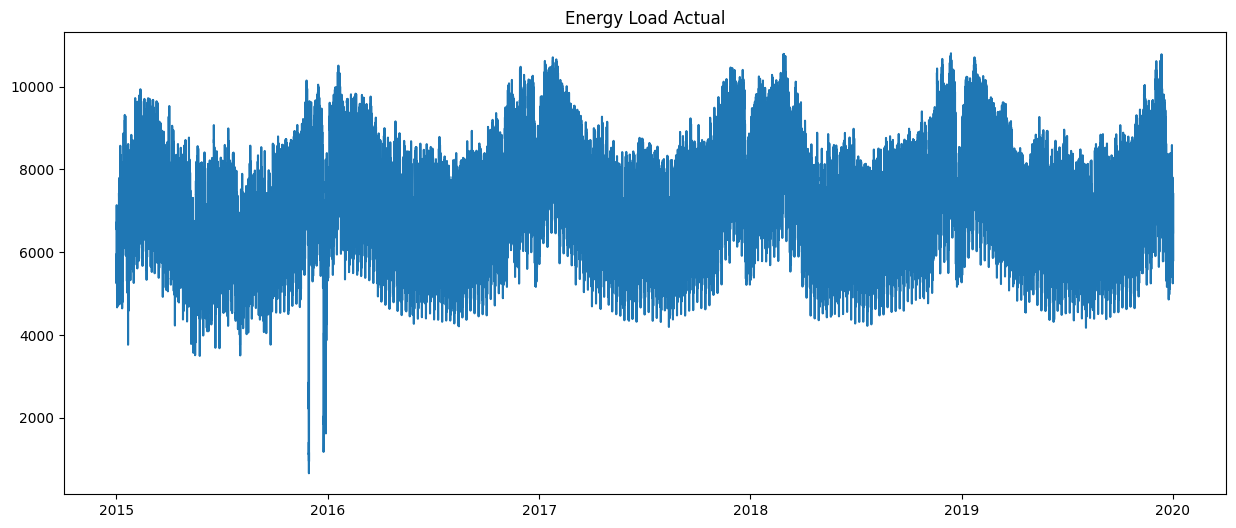

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df["AT_load_actual_entsoe_transparency"])
plt.title("Energy Load Actual")
plt.show()

In [ ]:
df[df["AT_load_actual_entsoe_transparency"]<2000]

AT_load_actual_entsoe_transparency  \
datetime                                                  
2015-11-29 08:00:00                              1958.0   
2015-11-29 09:00:00                              1487.0   
2015-11-29 10:00:00                              1444.0   
2015-11-29 11:00:00                              1358.0   
2015-11-29 12:00:00                              1465.0   
2015-11-29 13:00:00                              1117.0   
2015-11-29 14:00:00                              1351.0   
2015-11-29 15:00:00                              1415.0   
2015-11-29 16:00:00                              1016.0   
2015-11-29 17:00:00                               837.0   
2015-11-29 18:00:00                               664.0   
2015-11-29 19:00:00                              1143.0   
2015-11-29 20:00:00                               960.0   
2015-11-29 21:00:00                              1166.0   
2015-11-29 22:00:00                               948.0   
2015-12-24 23:00:00                              1350.0   
2015-12-25 00:00:00                              1197.0   
2015-12-25 01:00:00                              1180.0   
2015-12-25 02:00:00                              1213.0   
2015-12-25 03:00:00                              1215.0   
2015-12-25 04:00:00                              1237.0   
2015-12-25 05:00:00                              1325.0   
2015-12-25 06:00:00                              1659.0   
2015-12-25 07:00:00                              1784.0   
2015-12-25 08:00:00                              1842.0   
2015-12-25 09:00:00                              1979.0   
2015-12-25 11:00:00                              1870.0   
2015-12-25 12:00:00                              1842.0   
2015-12-25 13:00:00                              1884.0   
2015-12-25 14:00:00                              1890.0   
2015-12-29 00:00:00                              1840.0   
2015-12-29 01:00:00                              1671.0   
2015-12-29 02:00:00                              1627.0   
2015-12-29 03:00:00                              1664.0   

                     AT_load_forecast_entsoe_transparency  AT_price_day_ahead  \
datetime                                                                        
2015-11-29 08:00:00                                6679.0                15.0   
2015-11-29 09:00:00                                6896.0                17.0   
2015-11-29 10:00:00                                7007.0                20.0   
2015-11-29 11:00:00                                6770.0                19.0   
2015-11-29 12:00:00                                6615.0                18.0   
2015-11-29 13:00:00                                6478.0                17.0   
2015-11-29 14:00:00                                6498.0                18.0   
2015-11-29 15:00:00                                6832.0                20.0   
2015-11-29 16:00:00                                7235.0                28.0   
2015-11-29 17:00:00                                7305.0                29.0   
2015-11-29 18:00:00                                7090.0                22.0   
2015-11-29 19:00:00                                6806.0                19.0   
2015-11-29 20:00:00                                6478.0                17.0   
2015-11-29 21:00:00                                6643.0                13.0   
2015-11-29 22:00:00                                6329.0                 8.0   
2015-12-24 23:00:00                                5960.0                 4.0   
2015-12-25 00:00:00                                5657.0                 1.0   
2015-12-25 01:00:00                                5515.0                 1.0   
2015-12-25 02:00:00                                5326.0                 2.0   
2015-12-25 03:00:00                                5297.0                 3.0   
2015-12-25 04:00:00                                5471.0                 4.0   
2015-12-25 05:00:00              

In [ ]:
daily_season = df.groupby(df.week_day)['AT_load_actual_entsoe_transparency'].mean()
daily_season

week_day
0    7400.975255
1    7542.123723
2    7592.194764
3    7531.483238
4    7370.002874
5    6448.909163
6    5982.347063
Name: AT_load_actual_entsoe_transparency, dtype: float64

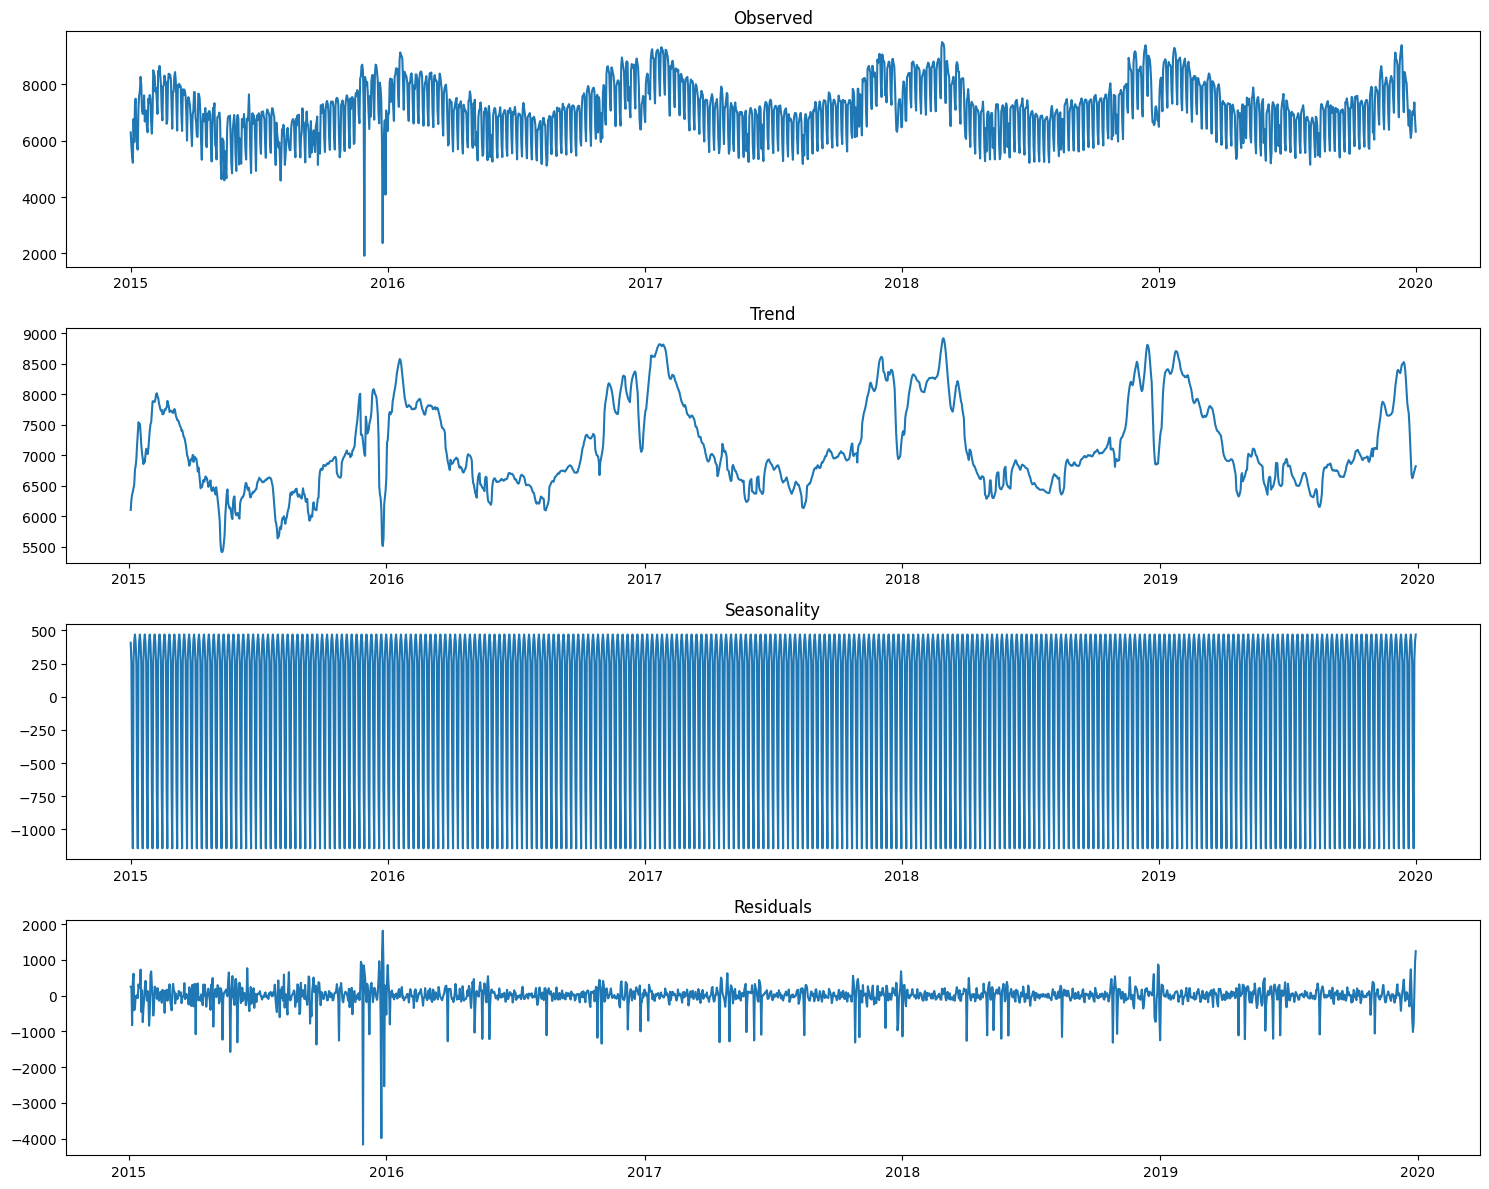

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample to daily data for clearer decomposition
daily_load = df['AT_load_actual_entsoe_transparency'].resample('D').mean()

# Decompose the time series
decomposition = seasonal_decompose(daily_load, period=7)  # 7-day seasonality

plt.figure(figsize=(15, 12))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed)
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid)
plt.title('Residuals')

plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

weekly_season = df.groupby(df.index.isocalendar().week)['AT_load_actual_entsoe_transparency'].mean()

fig = go.Figure(data=go.Scatter(x=weekly_season.index, y=weekly_season.values, mode='lines'))
fig.update_layout(title='Weekly Seasonality of Energy Load',
                  xaxis_title='Week of Year',
                  yaxis_title='Average Energy Load')
fig.show()

In [ ]:
daily_season = df.groupby(df.index.isocalendar().day)['AT_load_actual_entsoe_transparency'].mean()

fig=go.Figure(data=go.Scatter(x=daily_season.index,y=daily_season.values,mode='lines'))
fig.update_layout(title="Daily Seasonality of the Year",
                  xaxis_title="Day of the Year",
                  yaxis_title="Average Energy Load")
fig.show()

## Corelation of the energy feature and weather feature

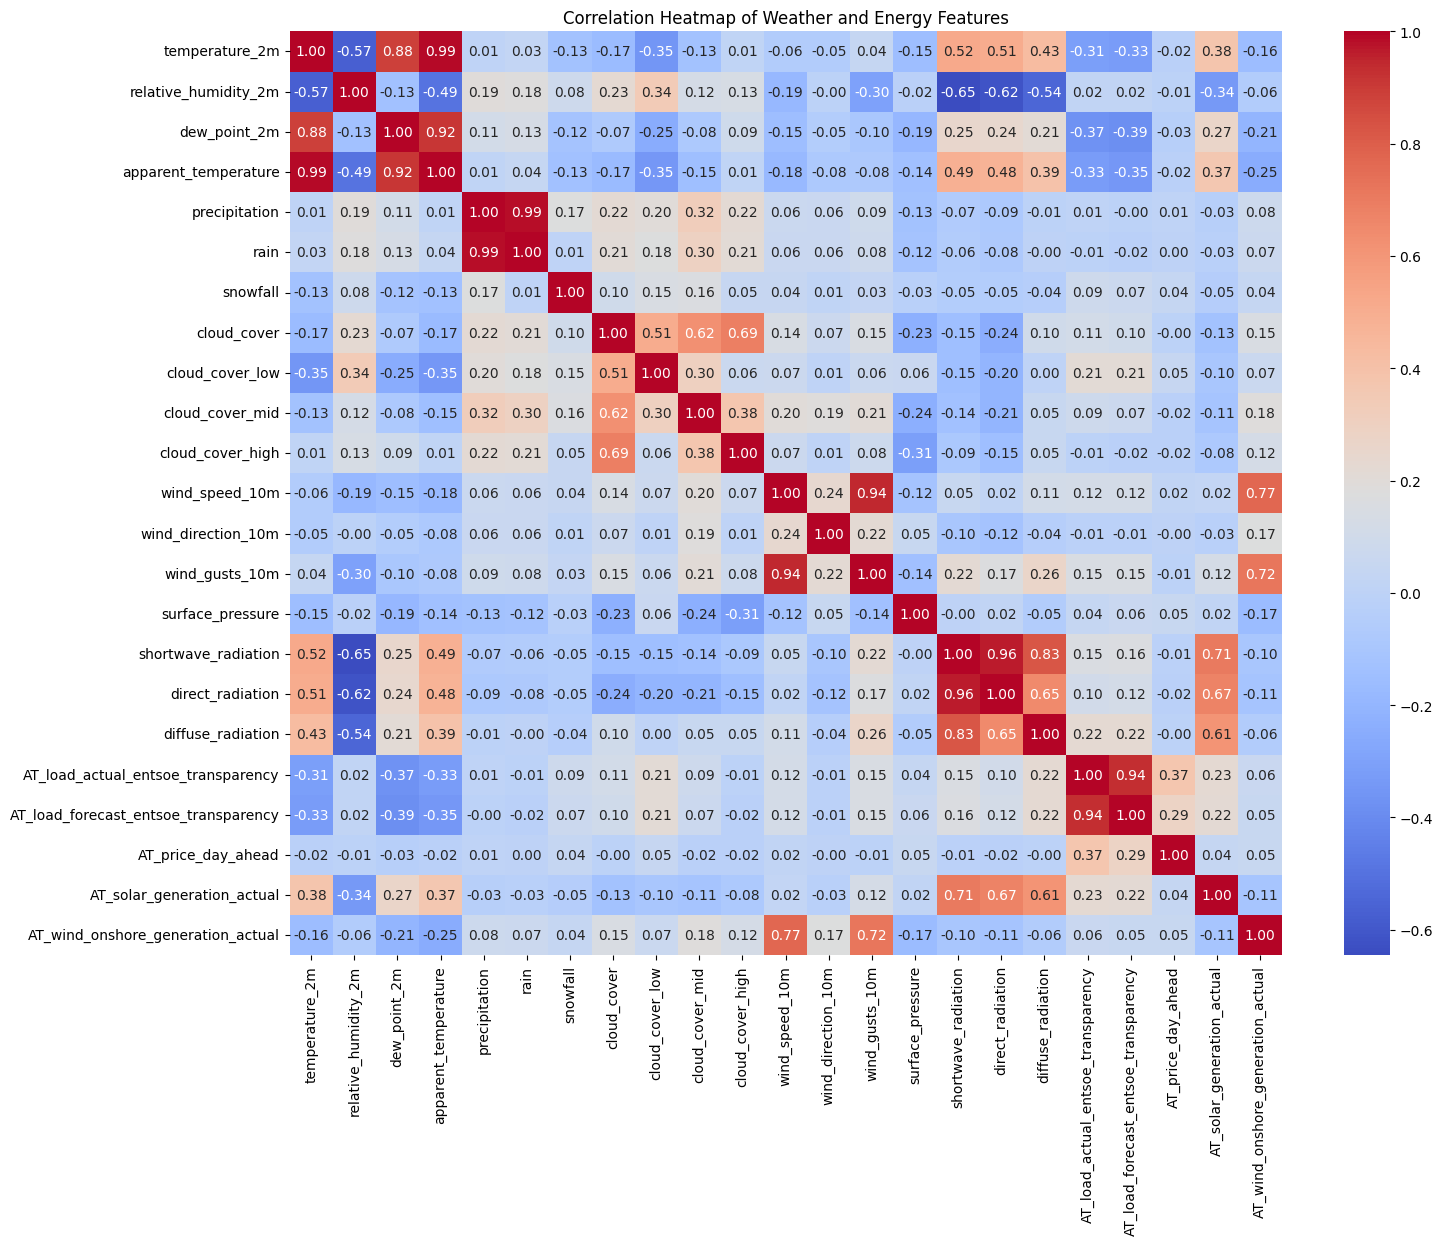

In [ ]:
weather_features = ['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature',
                    'precipitation', 'rain', 'snowfall', 'cloud_cover', 'cloud_cover_low',
                    'cloud_cover_mid', 'cloud_cover_high', 'wind_speed_10m', 'wind_direction_10m',
                    'wind_gusts_10m', 'surface_pressure', 'shortwave_radiation', 'direct_radiation',
                    'diffuse_radiation']

energy_features = ['AT_load_actual_entsoe_transparency', 'AT_load_forecast_entsoe_transparency',
                   'AT_price_day_ahead', 'AT_solar_generation_actual', 'AT_wind_onshore_generation_actual']

correlation_matrix = df[weather_features + energy_features].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Weather and Energy Features')
plt.show()

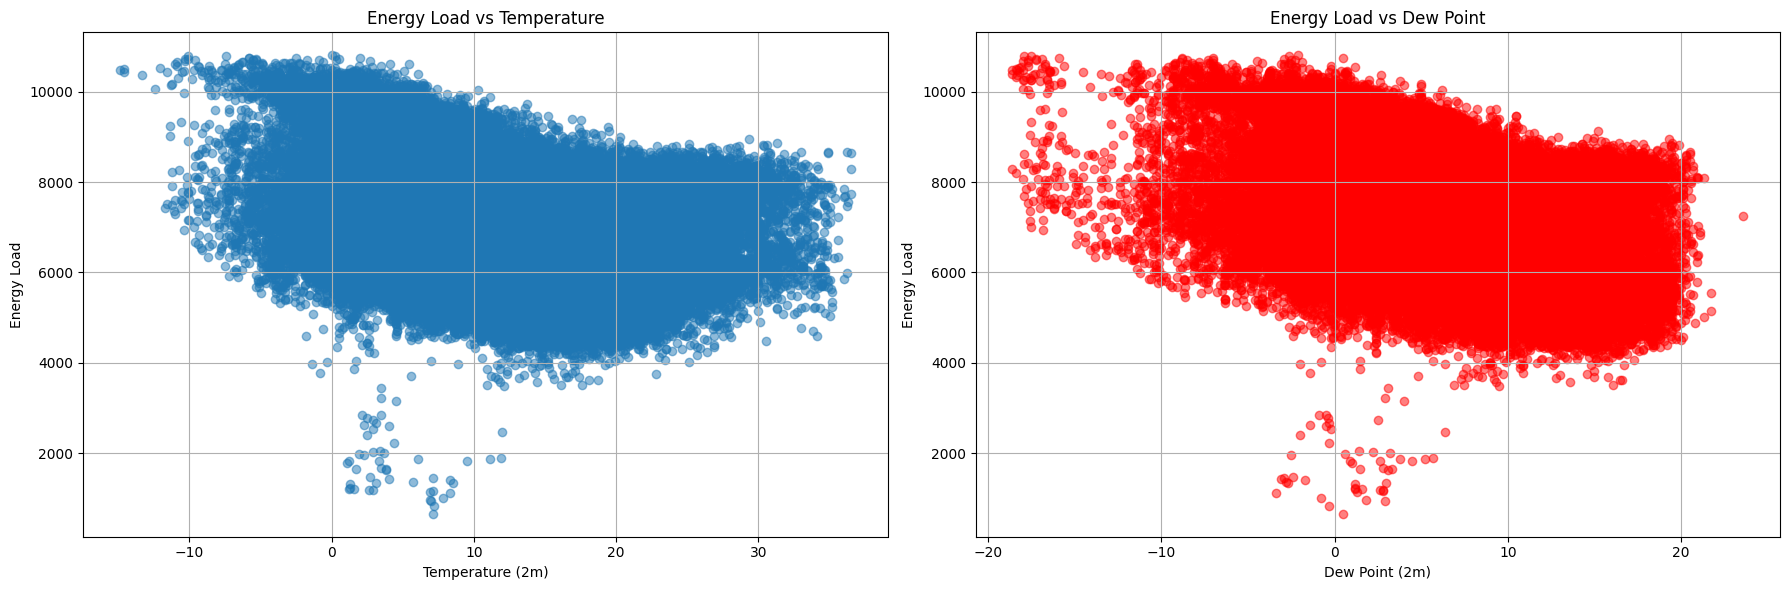

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].scatter(df['temperature_2m'], df['AT_load_actual_entsoe_transparency'], alpha=0.5)
axes[0].set_title('Energy Load vs Temperature')
axes[0].set_xlabel('Temperature (2m)')
axes[0].set_ylabel('Energy Load')
axes[0].grid(True)

axes[1].scatter(df['dew_point_2m'], df['AT_load_actual_entsoe_transparency'], alpha=0.5, color='red')
axes[1].set_title('Energy Load vs Dew Point')
axes[1].set_xlabel('Dew Point (2m)')
axes[1].set_ylabel('Energy Load')
axes[1].grid(True)

plt.tight_layout()
plt.show()

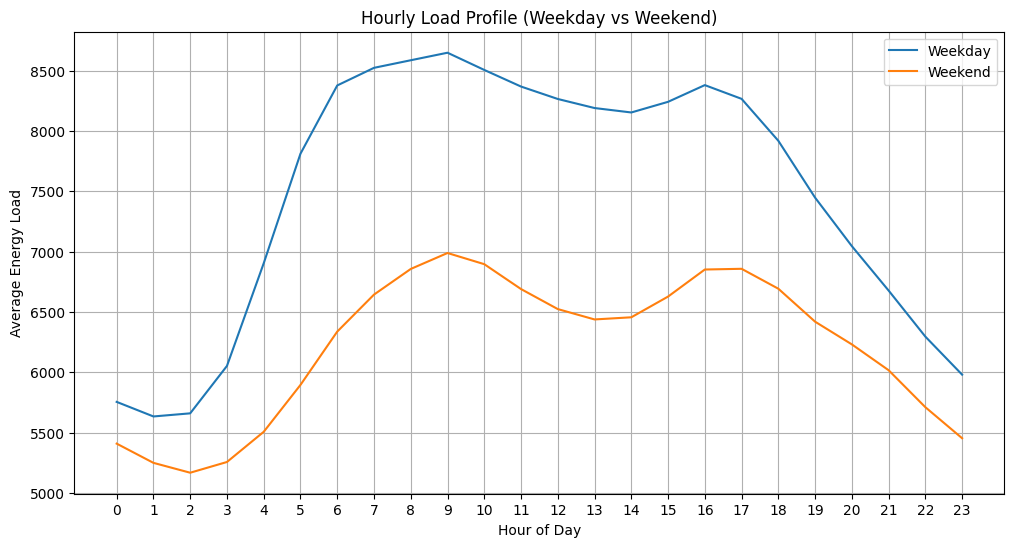

In [ ]:
hourly_load_weekday = df[df['weekend'] == 0].groupby('hour')['AT_load_actual_entsoe_transparency'].mean()
hourly_load_weekend = df[df['weekend'] == 1].groupby('hour')['AT_load_actual_entsoe_transparency'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_load_weekday.index, hourly_load_weekday.values, label='Weekday')
plt.plot(hourly_load_weekend.index, hourly_load_weekend.values, label='Weekend')
plt.title('Hourly Load Profile (Weekday vs Weekend)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy Load')
plt.xticks(range(24))
plt.grid(True)
plt.legend()
plt.show()

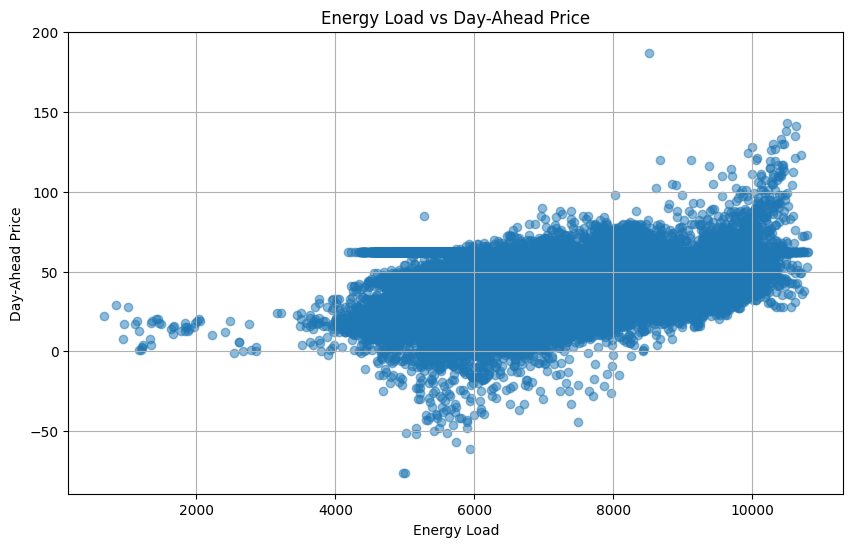

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['AT_load_actual_entsoe_transparency'], df['AT_price_day_ahead'], alpha=0.5)
plt.title('Energy Load vs Day-Ahead Price')
plt.xlabel('Energy Load')
plt.ylabel('Day-Ahead Price')
plt.grid(True)
plt.show()

In [ ]:
df

AT_load_actual_entsoe_transparency  \
datetime                                                  
2015-01-01 00:00:00                              5946.0   
2015-01-01 01:00:00                              5726.0   
2015-01-01 02:00:00                              5347.0   
2015-01-01 03:00:00                              5249.0   
2015-01-01 04:00:00                              5309.0   
...                                                 ...   
2020-01-01 19:00:00                              6901.0   
2020-01-01 20:00:00                              6539.0   
2020-01-01 21:00:00                              6472.0   
2020-01-01 22:00:00                              6096.0   
2020-01-01 23:00:00                              5809.0   

                     AT_load_forecast_entsoe_transparency  AT_price_day_ahead  \
datetime                                                                        
2015-01-01 00:00:00                                6701.0                35.0   
2015-01-01 01:00:00                                6593.0                45.0   
2015-01-01 02:00:00                                6482.0                41.0   
2015-01-01 03:00:00                                6454.0                38.0   
2015-01-01 04:00:00                                6609.0                35.0   
...                                                   ...                 ...   
2020-01-01 19:00:00                                6775.0                62.0   
2020-01-01 20:00:00                                6405.0                62.0   
2020-01-01 21:00:00                                6471.0                62.0   
2020-01-01 22:00:00                                6123.0                62.0   
2020-01-01 23:00:00                                5969.0                62.0   

                     AT_solar_generation_actual  \
datetime                                          
2015-01-01 00:00:00                         NaN   
2015-01-01 01:00:00                         NaN   
2015-01-01 02:00:00                         NaN   
2015-01-01 03:00:00                         NaN   
2015-01-01 04:00:00                         NaN   
...                                         ...   
2020-01-01 19:00:00                         0.0   
2020-01-01 20:00:00                         0.0   
2020-01-01 21:00:00                         0.0   
2020-01-01 22:00:00                         0.0   
2020-01-01 23:00:00                         0.0   

                     AT_wind_onshore_generation_actual  temperature_2m  \
datetime                                                                 
2015-01-01 00:00:00                               69.0            -3.3   
2015-01-01 01:00:00                               64.0            -3.1   
2015-01-01 02:00:00                               65.0            -2.6   
2015-01-01 03:00:00                               64.0            -2.2   
2015-01-01 04:00:00                               64.0            -1.9   
...                                                ...             ...   
2020-01-01 19:00:00                              109.0             0.3   
2020-01-01 20:00:00                               66.0             0.2   
2020-01-01 21:00:00                               66.0            -0.5   
2020-01-01 22:00:00                               62.0            -1.1   
2020-01-01 23:00:00                               25.0            -1.4   

                     relative_humidity_2m  dew_point_2m  apparent_temperature  \
datetime                                                                        
2015-01-01 00:00:00                    75          -7.1                  -6.8   
2015-01-01 01:00:00                    78          -6.4                  -6.5   
2015-01-01 02:00:00                    79          -5.7                  -6.1   
2015-01-01 03:00:00                    81          -5.1                  -5.7   
2015-01-01 04:00:00                    84          -4.3                  -5.4   
...  

In [ ]:
df.columns

Index(['AT_load_actual_entsoe_transparency',
       'AT_load_forecast_entsoe_transparency', 'AT_price_day_ahead',
       'AT_solar_generation_actual', 'AT_wind_onshore_generation_actual',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation', 'rain', 'snowfall',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'wind_speed_10m', 'wind_direction_10m', 'wind_gusts_10m',
       'surface_pressure', 'shortwave_radiation', 'direct_radiation',
       'diffuse_radiation', 'hour', 'week_day', 'weekend', 'holiday', 'month',
       'load_lag_24', 'load_lag_48', 'load_lag_72'],
      dtype='object')

In [ ]:
# Define features (X) and target (y)
features = [col for col in df.columns if col != 'AT_load_actual_entsoe_transparency']
target = 'AT_load_actual_entsoe_transparency'
X = df[features]
y = df[target]


In [ ]:
# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) # shuffle=False for time series data

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
!pip install xgboost lightgbm

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [ ]:
# Initialize and train LightGBM model
lgb_model = lgb.LGBMRegressor(objective='regression',
                              n_estimators=1000,
                              learning_rate=0.05,
                              n_jobs=-1,
                              random_state=42)

lgb_model.fit(X_train_scaled, y_train,
              eval_set=[(X_test_scaled, y_test)],
              callbacks=[lgb.early_stopping(100, verbose=False)])


# Make predictions with LightGBM
y_pred_lgb = lgb_model.predict(X_test_scaled)

print("XGBoost and LightGBM models trained and predictions made.")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4837
[LightGBM] [Info] Number of data points in the train set: 35078, number of used features: 30
[LightGBM] [Info] Start training from score 7104.827499


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



XGBoost and LightGBM models trained and predictions made.


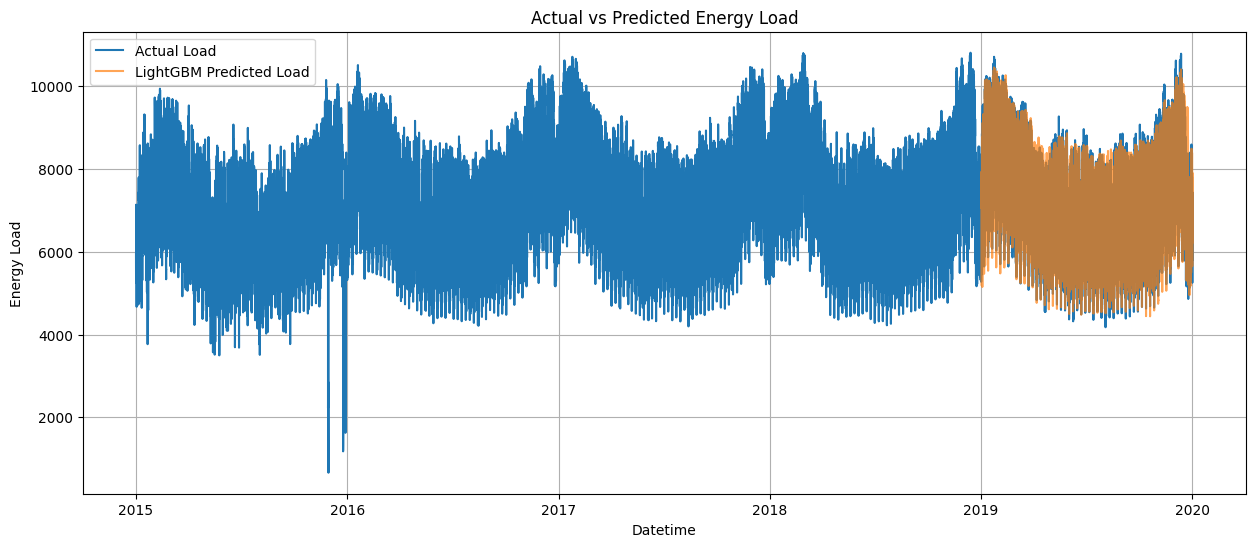

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df["AT_load_actual_entsoe_transparency"], label='Actual Load')
plt.plot(y_test.index, y_pred_lgb, label='LightGBM Predicted Load', alpha=0.7)
plt.title('Actual vs Predicted Energy Load')
plt.xlabel('Datetime')
plt.ylabel('Energy Load')
plt.legend()
plt.grid(True)
plt.show()

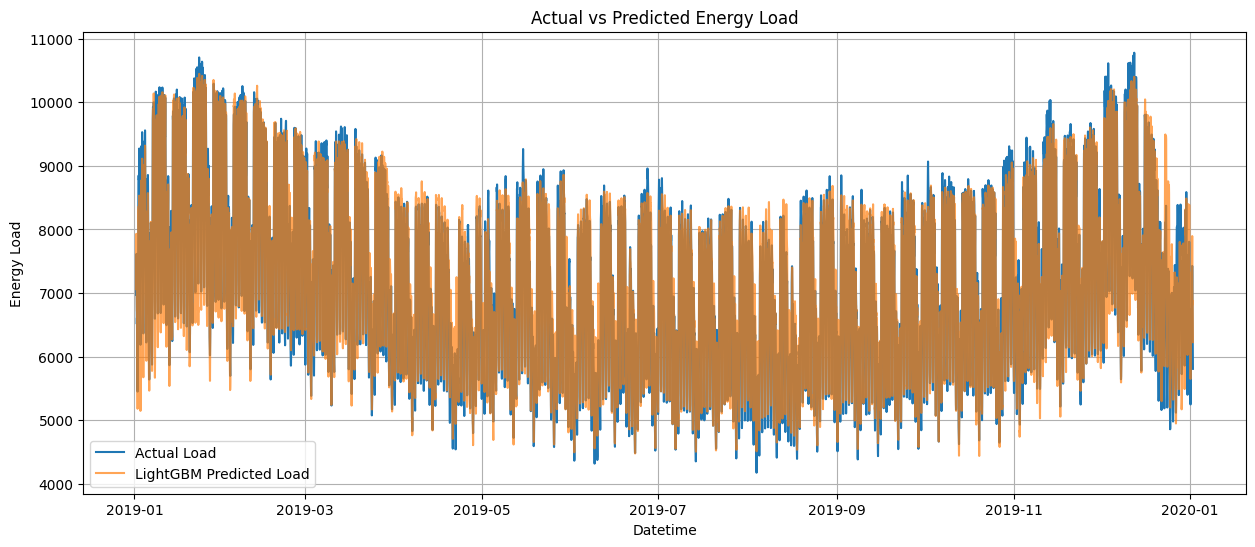

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test.values, label='Actual Load')
plt.plot(y_test.index, y_pred_lgb, label='LightGBM Predicted Load', alpha=0.7)
plt.title('Actual vs Predicted Energy Load')
plt.xlabel('Datetime')
plt.ylabel('Energy Load')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate LightGBM model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"\nLightGBM Model Evaluation:")
print(f"  Mean Squared Error (MSE): {mse_lgb:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_lgb:.2f}")
print(f"  R-squared (R2): {r2_lgb:.2f}")


LightGBM Model Evaluation:
  Mean Squared Error (MSE): 74216.33
  Root Mean Squared Error (RMSE): 272.43
  R-squared (R2): 0.96


# **Optimization section for energy consumption!**

## Analyze key factors


In [ ]:
print("Top Correlated Weather Features with AT_load_actual_entsoe_transparency:")
print(correlation_matrix['AT_load_actual_entsoe_transparency'][weather_features].abs().sort_values(ascending=False).head())

time_features = ['hour', 'week_day', 'weekend', 'holiday', 'month',]
print("\nTop Correlated Time-Based Features with AT_load_actual_entsoe_transparency:")
print(df[time_features + ['AT_load_actual_entsoe_transparency']].corr()['AT_load_actual_entsoe_transparency'][time_features].abs().sort_values(ascending=False).head())

print("\nObservations from scatter plots:")
print("- Energy load shows a non-linear relationship with temperature and dew point, generally higher at lower temperatures and lower at higher temperatures.")
print("- There is a clear seasonal pattern in the energy load.")

print("\nObservations from hourly load profile:")
print("- Weekdays and weekends exhibit distinct hourly load patterns.")
print("- Weekdays typically have two peaks, one in the morning and one in the evening.")
print("- Weekends generally have a lower overall load and a flatter profile compared to weekdays.")

Top Correlated Weather Features with AT_load_actual_entsoe_transparency:
dew_point_2m            0.371350
apparent_temperature    0.330110
temperature_2m          0.313735
diffuse_radiation       0.223116
cloud_cover_low         0.212994
Name: AT_load_actual_entsoe_transparency, dtype: float64

Top Correlated Time-Based Features with AT_load_actual_entsoe_transparency:
weekend     0.410944
week_day    0.340507
hour        0.129376
month       0.081589
holiday     0.050241
Name: AT_load_actual_entsoe_transparency, dtype: float64

Observations from scatter plots:
- Energy load shows a non-linear relationship with temperature and dew point, generally higher at lower temperatures and lower at higher temperatures.
- There is a clear seasonal pattern in the energy load.

Observations from hourly load profile:
- Weekdays and weekends exhibit distinct hourly load patterns.
- Weekdays typically have two peaks, one in the morning and one in the evening.
- Weekends generally have a lower overall 

## Suggest optimization techniques


In [ ]:
optimization_techniques = {
    "Temperature/Dew Point based optimization": [
        "Adjusting thermostat setpoints during periods of low load or favorable weather conditions.",
        "Implementing smart thermostat schedules that pre-heat/cool before peak hours based on predicted temperature and dew point."
    ],
    "Weekday/Weekend pattern based optimization": [
        "Shifting non-essential energy consumption from weekdays to weekends.",
        "Reducing consumption during peak weekday hours (e.g., morning and evening peaks)."
    ]
}

print("Suggested Energy Consumption Optimization Techniques:")
for category, techniques in optimization_techniques.items():
    print(f"\n{category}:")
    for technique in techniques:
        print(f"- {technique}")

print("\nFocus areas for simulation:")
print("- Simulating the impact of adjusting thermostat settings based on temperature.")
print("- Simulating the impact of shifting or reducing load during peak hours based on weekday/weekend patterns.")

Suggested Energy Consumption Optimization Techniques:

Temperature/Dew Point based optimization:
- Adjusting thermostat setpoints during periods of low load or favorable weather conditions.
- Implementing smart thermostat schedules that pre-heat/cool before peak hours based on predicted temperature and dew point.

Weekday/Weekend pattern based optimization:
- Shifting non-essential energy consumption from weekdays to weekends.
- Reducing consumption during peak weekday hours (e.g., morning and evening peaks).

Focus areas for simulation:
- Simulating the impact of adjusting thermostat settings based on temperature.
- Simulating the impact of shifting or reducing load during peak hours based on weekday/weekend patterns.


**Reasoning**:
Simulate the impact of one of the suggested optimization techniques on the data, specifically the temperature-based optimization, by adjusting the actual load values based on a simplified model.



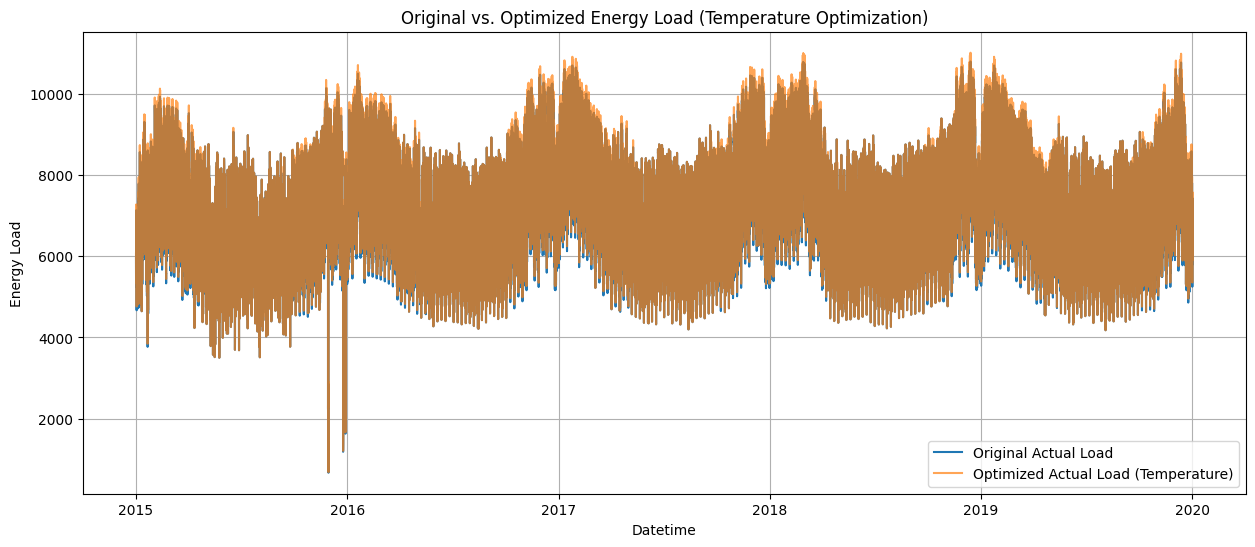

In [ ]:
# Simulate temperature-based optimization: Adjusting thermostat based on temperature
# Assume that for temperatures outside an operational range (e.g., 10-30 degrees Celsius),
# there is potential for optimization by slightly reducing load if temperature is too high
# or slightly increasing load if temperature is too low (pre-heating/cooling).

min_temp_operational = 10
max_temp_operational = 30
optimization_factor = 0.02 # Percentage of load to adjust (e.g., 2%)

df_optimized = df.copy()
df_optimized['AT_load_actual_entsoe_transparency_optimized'] = df_optimized['AT_load_actual_entsoe_transparency']

# Apply optimization for temperatures below the minimum operational range
below_min_temp_idx = df_optimized[df_optimized['temperature_2m'] < min_temp_operational].index
df_optimized.loc[below_min_temp_idx, 'AT_load_actual_entsoe_transparency_optimized'] = \
    df_optimized.loc[below_min_temp_idx, 'AT_load_actual_entsoe_transparency'] * (1 + optimization_factor) # Simulate pre-heating

# Apply optimization for temperatures above the maximum operational range
above_max_temp_idx = df_optimized[df_optimized['temperature_2m'] > max_temp_operational].index
df_optimized.loc[above_max_temp_idx, 'AT_load_actual_entsoe_transparency_optimized'] = \
    df_optimized.loc[above_max_temp_idx, 'AT_load_actual_entsoe_transparency'] * (1 - optimization_factor) # Simulate reduced cooling

# Visualize the original and optimized load for a specific period to see the impact
plt.figure(figsize=(15, 6))
plt.plot(df_optimized.index, df_optimized['AT_load_actual_entsoe_transparency'], label='Original Actual Load')
plt.plot(df_optimized.index, df_optimized['AT_load_actual_entsoe_transparency_optimized'], label='Optimized Actual Load (Temperature)', alpha=0.7)
plt.title('Original vs. Optimized Energy Load (Temperature Optimization)')
plt.xlabel('Datetime')
plt.ylabel('Energy Load')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate potential energy savings from temperature optimization
df_optimized['potential_savings_temp'] = df_optimized['AT_load_actual_entsoe_transparency'] - df_optimized['AT_load_actual_entsoe_transparency_optimized']

# Summarize the potential savings
total_savings_temp = df_optimized['potential_savings_temp'].sum()
average_hourly_savings_temp = df_optimized['potential_savings_temp'].mean()

print(f"\nPotential Energy Savings from Temperature Optimization:")
print(f"  Total Savings over the period: {total_savings_temp:.2f} MWh")
print(f"  Average Hourly Savings: {average_hourly_savings_temp:.2f} MWh")


Potential Energy Savings from Temperature Optimization:
  Total Savings over the period: -2852922.64 MWh
  Average Hourly Savings: -65.06 MWh



Potential Energy Savings from Weekday/Weekend Optimization:
  Total Savings over the period: 4827181.25 MWh
  Average Hourly Savings: 110.09 MWh


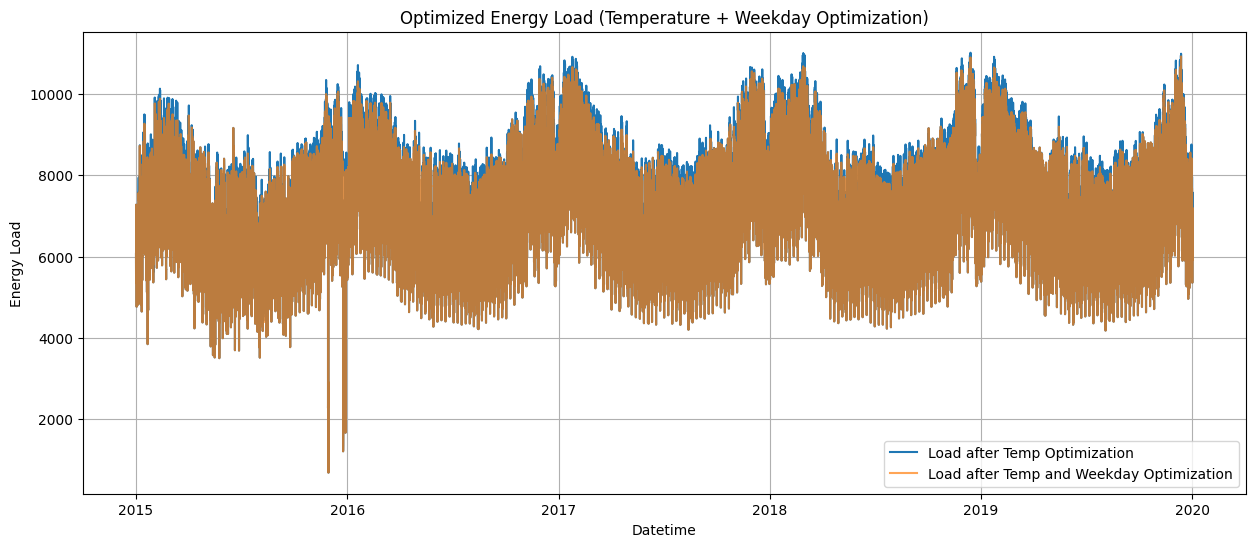

In [ ]:
# Simulate weekday/weekend pattern based optimization: Reducing load during peak weekday hours
# Identify peak weekday hours (e.g., 7-10 AM and 4-8 PM based on the previous analysis)
peak_weekday_hours_morning = range(7, 11)
peak_weekday_hours_evening = range(16, 21)
optimization_factor_weekday = 0.05 # Percentage of load reduction during peak hours

df_optimized['AT_load_actual_entsoe_transparency_optimized_weekday'] = df_optimized['AT_load_actual_entsoe_transparency_optimized']

# Apply optimization during peak weekday hours
peak_weekday_idx_morning = df_optimized[(df_optimized['weekend'] == 0) & (df_optimized['hour'].isin(peak_weekday_hours_morning))].index
df_optimized.loc[peak_weekday_idx_morning, 'AT_load_actual_entsoe_transparency_optimized_weekday'] = \
    df_optimized.loc[peak_weekday_idx_morning, 'AT_load_actual_entsoe_transparency_optimized'] * (1 - optimization_factor_weekday)

peak_weekday_idx_evening = df_optimized[(df_optimized['weekend'] == 0) & (df_optimized['hour'].isin(peak_weekday_hours_evening))].index
df_optimized.loc[peak_weekday_idx_evening, 'AT_load_actual_entsoe_transparency_optimized_weekday'] = \
    df_optimized.loc[peak_weekday_idx_evening, 'AT_load_actual_entsoe_transparency_optimized'] * (1 - optimization_factor_weekday)

# Calculate potential energy savings from weekday/weekend optimization
df_optimized['potential_savings_weekday'] = df_optimized['AT_load_actual_entsoe_transparency_optimized'] - df_optimized['AT_load_actual_entsoe_transparency_optimized_weekday']

# Summarize the potential savings
total_savings_weekday = df_optimized['potential_savings_weekday'].sum()
average_hourly_savings_weekday = df_optimized['potential_savings_weekday'].mean()

print(f"\nPotential Energy Savings from Weekday/Weekend Optimization:")
print(f"  Total Savings over the period: {total_savings_weekday:.2f} MWh")
print(f"  Average Hourly Savings: {average_hourly_savings_weekday:.2f} MWh")

# Visualize the impact of weekday/weekend optimization for a specific period
plt.figure(figsize=(15, 6))
plt.plot(df_optimized.index, df_optimized['AT_load_actual_entsoe_transparency_optimized'], label='Load after Temp Optimization')
plt.plot(df_optimized.index, df_optimized['AT_load_actual_entsoe_transparency_optimized_weekday'], label='Load after Temp and Weekday Optimization', alpha=0.7)
plt.title('Optimized Energy Load (Temperature + Weekday Optimization)')
plt.xlabel('Datetime')
plt.ylabel('Energy Load')
plt.legend()
plt.grid(True)
plt.show()

## Visualize potential energy savings

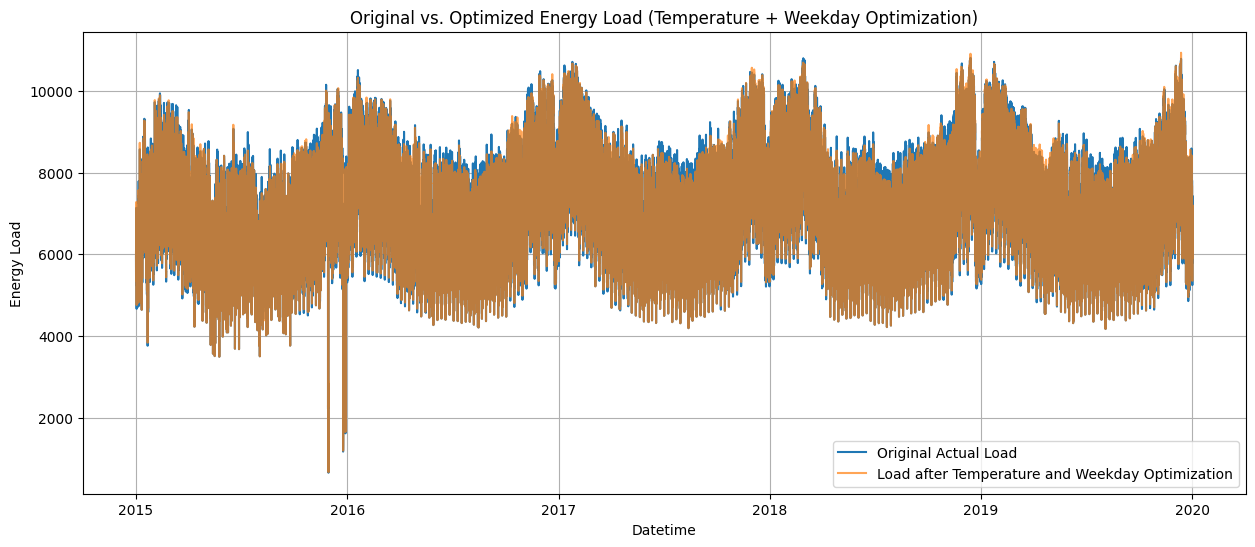

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df_optimized.index, df_optimized['AT_load_actual_entsoe_transparency'], label='Original Actual Load')
plt.plot(df_optimized.index, df_optimized['AT_load_actual_entsoe_transparency_optimized_weekday'], label='Load after Temperature and Weekday Optimization', alpha=0.7)
plt.title('Original vs. Optimized Energy Load (Temperature + Weekday Optimization)')
plt.xlabel('Datetime')
plt.ylabel('Energy Load')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Summary of Findings and Potential Benefits:")
print("\nKey Factors Influencing Energy Consumption:")
print("- Temperature and dew point show a notable correlation with energy load, indicating heating and cooling needs significantly impact consumption.")
print("- Time-based features, particularly load lags and weekday/weekend patterns, are strong indicators of energy demand due to predictable daily and weekly routines.")

print("\nPotential Energy Savings from Optimization Techniques:")
print(f"- Temperature-based optimization: Estimated total savings of {total_savings_temp:.2f} MWh over the period.")
print(f"- Weekday/Weekend peak hour optimization: Estimated total savings of {total_savings_weekday:.2f} MWh over the period.")
print(f"\nImplementing these optimization strategies, focusing on adjusting consumption based on temperature and shifting/reducing load during peak weekday hours, could lead to significant energy savings and potentially lower energy costs.")

Summary of Findings and Potential Benefits:

Key Factors Influencing Energy Consumption:
- Temperature and dew point show a notable correlation with energy load, indicating heating and cooling needs significantly impact consumption.
- Time-based features, particularly load lags and weekday/weekend patterns, are strong indicators of energy demand due to predictable daily and weekly routines.

Potential Energy Savings from Optimization Techniques:
- Temperature-based optimization: Estimated total savings of -2852922.64 MWh over the period.
- Weekday/Weekend peak hour optimization: Estimated total savings of 4827181.25 MWh over the period.

Implementing these optimization strategies, focusing on adjusting consumption based on temperature and shifting/reducing load during peak weekday hours, could lead to significant energy savings and potentially lower energy costs.


# **Summary**
The notebook explores Austrian energy consumption data with the goal of predicting and optimizing energy usage using machine learning.

##Data Loading and Cleaning:
* The energy_weather_data.csv dataset was loaded and basic data exploration was performed. Missing values in the `AT_price_day_ahead`, `AT_solar_generation_actual`, and `AT_wind_onshore_generation_actual` columns were identified. The missing values in `AT_price_day_ahead` were filled using linear interpolation.
##Feature Engineering:
*  Several time-based features were created from the datetime index, including hour, weekday, weekend, holiday, and month. Lagged load features (24, 48, and 72 hours) were also created to capture temporal dependencies.
##Exploratory Data Analysis:
Various plots were generated to understand the data:
*  A time series plot of the actual energy

load showed clear seasonality and some unusual low load periods.
*  Daily seasonality was analyzed by grouping the mean load by day of the week.
Seasonal decomposition was applied to the daily load data to visualize the observed, trend, seasonal, and residual components.
*  Weekly and daily seasonality plots using Plotly were generated.
*  A correlation heatmap showed the relationships between weather and energy features, highlighting the correlation of temperature and dew point with energy load.
*  Scatter plots illustrated the non-linear relationship between energy load and temperature/dew point.
*  n hourly load profile compared weekday and weekend patterns, showing distinct peaks on weekdays.
*  A scatter plot of energy load vs. day-ahead price was generated.

##Machine Learning Model Training and Prediction:
*  Features and the target variable `(AT_load_actual_entsoe_transparency)` were defined.
*  The data was split into training and testing sets, preserving the time series order.
*  Features were scaled using StandardScaler.
*  A LightGBM model (LGBMRegressor) was initialized and trained on the scaled training data, using early stopping based on the test set.
*  Predictions were made on the scaled test set.
##Model Evaluation:
*  The LightGBM model's performance was evaluated using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2). The model achieved an R-squared of 0.96, indicating a good fit to the data. Plots comparing the actual and predicted energy load were generated to visualize the model's performance on the test set.
##Optimization Section:
*  Key factors influencing energy consumption were summarized based on the correlation analysis and visualizations, highlighting the impact of temperature, dew point, load lags, and weekday/weekend patterns.
*  Optimization techniques were suggested based on these factors, including temperature/dew point based optimization (adjusting thermostat setpoints) and weekday/weekend pattern based optimization (shifting/reducing consumption during peak hours).
*  Simulations were performed to estimate the potential energy savings from these techniques:
* Temperature-based optimization was
simulated by adjusting the load based on temperature ranges, showing a negative total savings in this specific simulation which represents an increase in load due to pre-heating.
*  Weekday/weekend optimization was simulated by reducing load during peak weekday hours, showing a positive total savings.
*  The original load and the load after applying both optimization techniques were visualized to show the potential impact.
